<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pokemon-Analysis" data-toc-modified-id="Pokemon-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pokemon Analysis</a></span><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-the-pokemon-base-stats" data-toc-modified-id="Distribution-of-the-pokemon-base-stats-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Distribution of the pokemon base stats</a></span></li><li><span><a href="#Perfrom-Principal-Component-Analysis" data-toc-modified-id="Perfrom-Principal-Component-Analysis-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Perfrom Principal Component Analysis</a></span></li></ul></li><li><span><a href="#Visualize-the-dataset" data-toc-modified-id="Visualize-the-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualize the dataset</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#Mean-Shift-Clustering" data-toc-modified-id="Mean-Shift-Clustering-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Mean Shift Clustering</a></span></li><li><span><a href="#Outlier-Analysis" data-toc-modified-id="Outlier-Analysis-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Outlier Analysis</a></span><ul class="toc-item"><li><span><a href="#Analyze-Cluster-2" data-toc-modified-id="Analyze-Cluster-2-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Analyze Cluster 2</a></span></li><li><span><a href="#Analyze-Cluster-3" data-toc-modified-id="Analyze-Cluster-3-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>Analyze Cluster 3</a></span></li></ul></li><li><span><a href="#Kmeans" data-toc-modified-id="Kmeans-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Kmeans</a></span></li></ul></li></ul></li><li><span><a href="#Pokemon-Combat-Prediction" data-toc-modified-id="Pokemon-Combat-Prediction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pokemon Combat Prediction</a></span></li></ul></div>

# Pokemon Analysis
## Principal Component Analysis

Since clustering generally depends on some sort of distance measure, which groups the points that are near each other into the same cluster. However, in high dimensional spaces, distance measures do not work very well. Therefore, I tried to reduce the number of dimensions first by implementing PCA so that the distance metric can make sense.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#load pokemon data
pokemon = pd.read_csv("/Users/gillianchiang/Desktop/Course/year4_sem2/COMP4912/Data/pokemon-challenge/pokemon.csv")

In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
mega = pokemon['Name'].str.contains('Mega')    
pokemon['Mega'] = mega

### Distribution of the pokemon base stats

In [6]:
pokemon["Total"] = pokemon["HP"] + pokemon["Attack"] + pokemon["Defense"] + pokemon["Sp. Atk"] + pokemon["Sp. Def"] + pokemon["Speed"]
stats=['Attack', 'Defense','HP', 'Sp. Atk','Sp. Def', 'Speed', 'Total']

In [7]:
%%
from pandas.plotting import scatter_matrix
scatter_matrix(pokemon[stats], alpha=0.2, figsize=(10, 10), diagonal='kde')
scatter_matrix

ERROR:root:Cell magic `%%` not found.


In [8]:
#standardize the data
stat = ['HP', 'Attack', 'Defense', 'Sp. Atk','Sp. Def', 'Speed']
poke_stat_scaled = StandardScaler().fit_transform(pokemon[stat])

print("mean: "+str(poke_stat_scaled[:,0].mean()))  # very close to 0
print("SD: "+str(poke_stat_scaled[:,0].std()))  # very close to 1

mean: -2.48689957516e-16
SD: 1.0


### Perfrom Principal Component Analysis

In [9]:
#pca
pca = PCA(n_components = 'mle',svd_solver='full') #maximum likelihood estimation
pcscores = pd.DataFrame(pca.fit_transform(poke_stat_scaled)) 
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
#print(pca.explained_variance_ratio_)
#print(pca.explained_variance_)

print("Number of principle components: "+str(pca.n_components_))
pcaVarRatioSum = 0
for i in range(pca.n_components_):
    pcaVarRatio = pca.explained_variance_ratio_.tolist()
    pcaSingleVarRatio = "{:.2%}".format(pcaVarRatio[i])
    print("PC"+str(i+1)+": "+str(pcaSingleVarRatio))
    pcaVarRatioSum = pcaVarRatioSum + pcaVarRatio[i]
print("Total explained variance ratio: "+"{:.2%}".format(pcaVarRatioSum))
    
    

Number of principle components: 5
PC1: 45.19%
PC2: 18.23%
PC3: 12.98%
PC4: 12.01%
PC5: 7.14%
Total explained variance ratio: 95.55%


When we perform PCA with Maximum Likelihood Estimation, the base stats are reduced to 5 principle components, which explained 95.55% of variance. This shows that PCA might not be an neccessary step before implementing the clustering method in this dataset.

In [10]:
#loading factors
loadings = pd.DataFrame(pca.components_, columns=stat)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
loadings

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
PC1,0.389886,0.439254,0.363747,0.457162,0.448570,0.335440
PC2,0.084835,-0.011825,0.628789,-0.305414,0.239097,-0.668463
PC3,-0.471926,-0.594153,0.069339,0.305612,0.565594,0.078513
PC4,0.717691,-0.405836,-0.419237,0.147517,0.185445,-0.297163
PC5,0.219991,-0.190255,0.059032,-0.735345,0.300200,0.530161


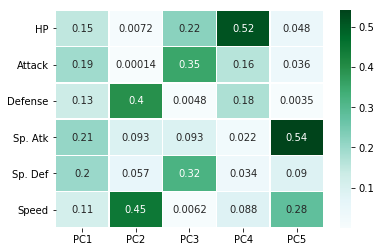

In [11]:
#visualize the square values of loading factors
load_sqr = loadings**2 #so that the sum of the stats will equal to 1
ax1 = sns.heatmap(load_sqr.transpose(), linewidths=0.5, cmap="BuGn", annot=True)
ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=0)
ax1.set_yticklabels(ax1.yaxis.get_majorticklabels(), rotation=0)
plt.show()

The darkest shades in the plot above indicate which parameters are the most important. For example, PC4 show that HP is the most dominant parameter. That is, Pokemon with high HP will have high absolute values of PC4.<br>
<br>
However, if you want to see more trends, the <b>actual values</b> of the loading factors will give you more insights:

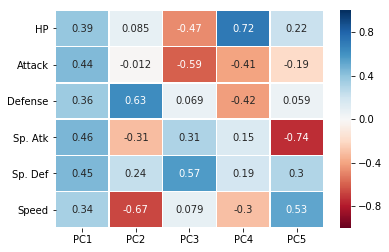

In [12]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0)
plt.show()

For example, a Pokemon with high Defense or low Speed will have a positive value of PC2. On the other hand, things like Attack or Sp. Defense will control what value a Pokemon will have for PC3.

The next step, I would like first visualize the dataset, then implement clustering method to find out the how the pokemons can be grouped together.

--------------------------------

## Visualize the dataset

I use <b>biplot</b> to examine the data, which is a scatter plot with vectors indicating what direction a datapoint will take in the PCA given its underlying parameters. In addition, the <b>Pokemon Type</b> will be colored to see if there is any obvious trends.

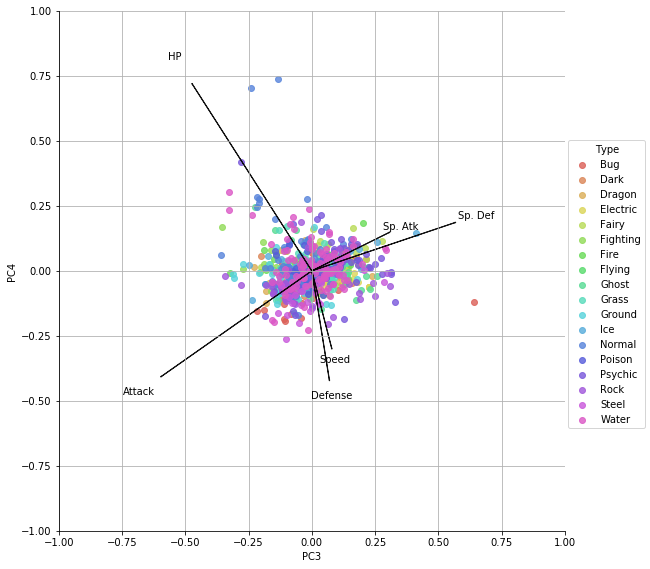

In [13]:
from math import sqrt
# Create labels abased on Type 1
labels = set(pokemon['Type 1'])
pokemon['type'] = pokemon['Type 1']
lab_dict = dict()
for i, elem in enumerate(labels):
    lab_dict[elem] = i
pokemon = pokemon.replace({'type' : lab_dict})

pc_types = pcscores.copy()
pc_types['Type'] = pokemon['Type 1']
pc_types = pc_types.sort_values('Type')

# Biplots
def biplot(pcscores, loadings, xval=0, yval=1, max_arrow=0.2, alpha=0.4):
    n = loadings.shape[1]
    scalex = 1.0 / (pcscores.iloc[:, xval].max() - pcscores.iloc[:, xval].min())  # Rescaling to be from -1 to +1
    scaley = 1.0 / (pcscores.iloc[:, yval].max() - pcscores.iloc[:, yval].min())

    pcscores.iloc[:, xval] = pcscores.iloc[:, xval] * scalex
    pcscores.iloc[:, yval] = pcscores.iloc[:, yval] * scaley

    g = sns.lmplot(x='PC{}'.format(xval + 1), y='PC{}'.format(yval + 1), hue='Type', data=pcscores,
                   fit_reg=False, size=8, palette=sns.color_palette("hls", n_colors=20))

    for i in range(n):
        # Only plot the longer ones
        length = sqrt(loadings.iloc[xval, i] ** 2 + loadings.iloc[yval, i] ** 2)
        if length < max_arrow:
            continue

        plt.arrow(0, 0, loadings.iloc[xval, i], loadings.iloc[yval, i], color='k', alpha=0.9)
        plt.text(loadings.iloc[xval, i] * 1.15, loadings.iloc[yval, i] * 1.15,
                 loadings.columns.tolist()[i], color='k', ha='center', va='center')
        
    g.set(ylim=(-1, 1))
    g.set(xlim=(-1, 1))   
    plt.grid(True)
    
# Actually make a biplot (PC3 vs PC4)
biplot(pc_types, loadings, 2, 3, max_arrow=0.3)

<b>Check whether the PCA result is as expected:</b>
- There are 2 normal type pokemon with high value of PC4, which means they probably have high HP and low Attack, Defense and Speed. 

In [14]:
pcscores.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.556375,-0.021482,0.666504,0.184176,-0.403807
1,-0.362867,-0.050269,0.667913,0.269254,-0.225788
2,1.280152,-0.062720,0.623914,0.331391,-0.001545
3,2.620916,0.704263,0.995538,-0.199321,-0.310170
4,-1.758284,-0.706179,0.411454,-0.268602,-0.168877


In [15]:
#find the pokemons in PC4 with highest HP
pc4_poke = pc_types.sort_values(by='PC4', ascending=False)[:2]
pokemon.loc[pc4_poke.index]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega,Total,type
261,262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False,False,540,9
121,122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False,False,450,9


In [16]:
#sort the pokemon data by HP
pokemon.sort_values(by='HP', ascending=False)[:2]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega,Total,type
261,262,Blissey,Normal,NaN,255,10,10,75,135,55,2,False,False,540,9
121,122,Chansey,Normal,NaN,250,5,5,35,105,50,1,False,False,450,9


- There is 1 bug type pokemon with high value of PC3, which means it probably has high Sp. Def and low HP, Sp. Atk and Speed. 

In [17]:
#find the pokemons in PC3 with highest Sp. Def
pc3_poke = pc_types.sort_values(by='PC3', ascending=False)[:1]
pokemon.loc[pc3_poke.index]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega,Total,type
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,False,505,14


In [18]:
pokemon.sort_values(by='Sp. Def', ascending=False)[:1]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Mega,Total,type
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,False,505,14



The result is as expected. However, most pokemons are centrally distributed, which can hardly observe any trends between the types. 

In [19]:
%%
g = sns.pairplot(pc_types, hue='Type', palette=sns.color_palette("RdBu", n_colors=20))

ERROR:root:Cell magic `%%` not found.


After visualizing the data, the next step is to implement clustering methods put the pokemons into groups.

--------------------------------

## Clustering
### Mean Shift Clustering

Since we do not know how many clusters will there be in this dataset, we adopted <b>Mean Shift Clustering</b> to implement unsupervised machine learning.

In [20]:
#clustering 
ms = MeanShift()
ms.fit(pcscores)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
pcscores_arr = np.array(pcscores)
colors = plt.cm.tab10(np.linspace(0, 1, 10))

unique, counts = np.unique(labels, return_counts=True)
cluster_counts = np.asarray((unique, counts)).T
n_clusters_ = len(cluster_counts)

print("Number of estimated clusters:", n_clusters_)
for i in range(len(cluster_counts)):
    group = 'cluster'+str(i+1)
    print("Count of "+group+' :', cluster_counts[i][1])

Number of estimated clusters: 3
Count of cluster1 : 796
Count of cluster2 : 3
Count of cluster3 : 1


1. According to the mean shift clustering method, we can discover that most of the pokemons are in the same cluster.
2. Although we reduced the dimensions from 6 to 4, it is still hard to view 4D data, therefore, we tried to used 2D plot and 3D plot to visualize the data with the cluster center. 

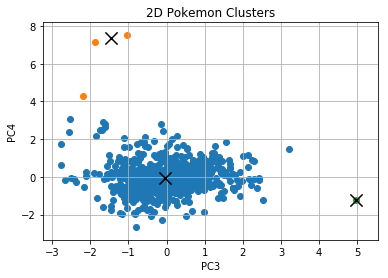

In [21]:
#2D visualization
fig, ax = plt.subplots()
for i in range(len(pcscores_arr)):
    ax.scatter(pcscores_arr[i][2], pcscores_arr[i][3], c=colors[labels[i]])
ax.scatter(cluster_centers[:,2],cluster_centers[:,3], marker="x",color='k', s=150, linewidths = 5, zorder=10)
plt.title('2D Pokemon Clusters')
ax.set_xlabel('PC3')
ax.set_ylabel('PC4')
plt.grid(True)
plt.show()

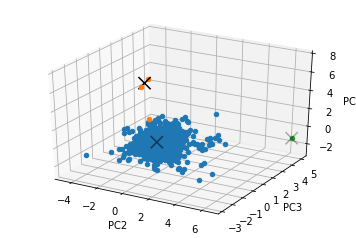

Clusters centers points:
[[-0.53164448 -0.1094121  -0.03073481 -0.04129142  0.01750439]
 [ 1.40144978  0.23972975 -1.4577019   7.34232795  2.5052496 ]
 [ 1.07656453  6.41447043  4.97934432 -1.20451716  2.23986007]]


In [22]:
#3D visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(pcscores_arr)):
    ax.scatter(pcscores_arr[i][1], pcscores_arr[i][2], pcscores_arr[i][3], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,1],cluster_centers[:,2],cluster_centers[:,3], marker="x",color='k', s=150, linewidths = 5, zorder=10)
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')
ax.set_zlabel('PC4')
plt.show()
print("Clusters centers points:")
print(cluster_centers)

Mean shift clustering is first used because we don't know how many clusters will there be in this data. After implementing the method, the pokemon data is separated into 3 clusters. However, the result showed that the first cluster has contained 99.375% of pokemons. The next step, I would like to first focus on the outliners (cluster 2 and cluster 3).

### Outlier Analysis

In [23]:
plabel = pokemon.copy()
plabel['label'] = labels
newPokemon = pd.concat([plabel, pcscores], axis=1)

In [24]:
combats = pd.read_csv("/Users/gillianchiang/Desktop/Course/year4_sem2/COMP4912/Data/pokemon-challenge/combats.csv")

In [25]:
#outlier = newPokemon.loc[:,['#','label']]
outlier = newPokemon.query('label  == [1, 2]').sort_values(by='label')
outlier

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Legendary,Mega,Total,type,label,PC1,PC2,PC3,PC4,PC5
121,122,Chansey,Normal,NaN,250,5,5,35,105,50,...,False,False,450,9,1,0.749816,0.297262,-1.869955,7.172270,2.735804
217,218,Wobbuffet,Psychic,NaN,190,33,58,33,58,33,...,False,False,405,16,1,-0.151475,1.162863,-2.175783,4.273044,1.382044
261,262,Blissey,Normal,NaN,255,10,10,75,135,55,...,False,False,540,9,1,2.053084,0.182197,-1.045449,7.512386,2.274695
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,...,False,False,505,14,2,1.076565,6.414470,4.979344,-1.204517,2.239860


1. Cluster 2 (label 1): 
    - 2 pokemons are normal type and another one is psychic
    - All of them have high PC4
    - High HP, Low attack and defense
    - None Legendary or Mega-evolved pokemon 
2. Cluster 3 (label 2): 
    - High Defense and Sp.Def
    - Low HP, Attack, Sp. Atk, Speed
    - High value of PC2 and PC3 and low value of PC1 and PC4
    - None Legendary or Mega-evolved pokemon 

#### Analyze Cluster 2

In [26]:
clus2_Idx = outlier.query('label == 1')['#'].tolist()
clus2_combat = combats[combats['First_pokemon'].isin(clus2_Idx) | combats['Second_pokemon'].isin(clus2_Idx)]
clus2_combat.head()

,First_pokemon,Second_pokemon,Winner
258,644,218,644
452,122,588,588
506,262,67,67
589,262,210,210
660,262,47,47


In [27]:
clus2_win = clus2_combat.copy()
clus2_win['WinCombat'] = clus2_win['Winner'].isin(clus2_Idx)
clus2_win['WinCombat'] = np.where(clus2_win['WinCombat'] == True, clus2_win['Winner'], "Others")

In [28]:
clus2_win_count = clus2_win.pivot_table(values='Winner', index=['WinCombat'], aggfunc='count')
clus2_win_count

,Winner
WinCombat,
122,15
218,18
262,40
Others,287


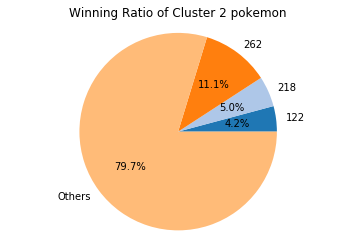

In [29]:
colors = plt.cm.tab20(np.linspace(0, 1, 20))
fig1, ax1 = plt.subplots()
ax1.pie(clus2_win_count.loc[clus2_win_count.index], labels=clus2_win_count.index, colors=colors, autopct='%1.1f%%')
ax1.axis('equal') 
plt.title("Winning Ratio of Cluster 2 pokemon")
plt.show()

The result shows that although pokemons in cluster 2 has low attack and defense, however, with high HP, they may still win the game. Therefore, we would like to conduct a further anaylsis to discover in what kind of situation these pokemons could win the combat.

In [30]:
outlier_win = clus2_win.query('WinCombat != "Others"').copy()
outlier_win['isFstPoke'] = outlier_win['First_pokemon'].isin(outlier_win['Winner'])

clus2_win_fs = outlier_win.pivot_table(values='Winner', index=['WinCombat'], columns=['isFstPoke'], aggfunc='count')
clus2_win_fs.columns = ['First_pokemon', 'Second_pokemon']
clus2_win_fs

,First_pokemon,Second_pokemon
WinCombat,,
122,3,12
218,12,6
262,24,16


#### Analyze Cluster 3

In [31]:
clus3_Idx = outlier.query('label == 2')['#'].tolist()
clus3_combat = combats[combats['First_pokemon'].isin(clus3_Idx) | combats['Second_pokemon'].isin(clus3_Idx)]

In [32]:
clus3_win = clus3_combat.copy()
clus3_win['WinCombat'] = clus3_win['Winner'].isin(clus3_Idx)
clus3_win['WinCombat'] = np.where(clus3_win['WinCombat'] == True, clus3_win['Winner'], "Others")

In [33]:
clus3_win = clus3_win.pivot_table(values='Winner', index=['WinCombat'], aggfunc='count')
clus3_win

,Winner
WinCombat,
Others,135


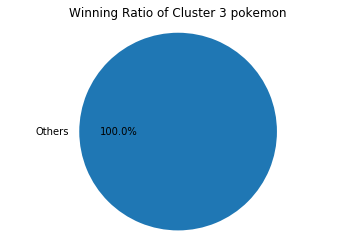

In [34]:
colors = plt.cm.tab20(np.linspace(0, 1, 20))
fig1, ax1 = plt.subplots()
ax1.pie(clus3_win.loc[clus3_win.index], labels=clus3_win.index, colors=colors, autopct='%1.1f%%')
ax1.axis('equal') 
plt.title("Winning Ratio of Cluster 3 pokemon")
plt.show()

Among the 135 combats, Shuckle (#231) lost all the games, which may predict although having a high defense and Sp.Def (high PC2 and PC3), it could not help it win the combat.  

After analyzing the outliers, I would like to use Kmeans clustering method to do a further analysis. Unlike mean shift, kmeans allows the users to decide how many clusters they would like the machine to generate. In this way, I could find out how the machine will divide cluster 1. 

### Kmeans

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

Find the optimal k (number of clusters):
- Elbow Method
- Silhouette Method

In [36]:
#elbow method
x = []
y = []
for k in range (1, 11):
    # create a kmeans model on our data, using k clusters.  
    # random_state helps ensure that the algorithm returns the same results each time.
    ekmeans = KMeans(n_clusters=k, random_state=10).fit(pcscores.iloc[:, :])
    eklabels = ekmeans.labels_
    # sum of distances of samples to their closest cluster center
    interia = ekmeans.inertia_
    x.append(k)
    y.append(interia)

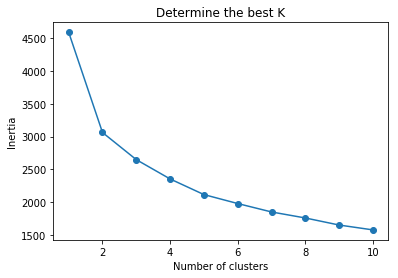

In [37]:
f, ax = plt.subplots()
ax.plot(x, y, zorder=2, marker='o')

#for i, txt in enumerate(y):
#    ax.annotate(int(txt), (x[i],y[i]))

plt.title("Determine the best K")    
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Inertia")
plt.show()

Although the elbow point of this dataset is not really obvious, according to this result, I will choose to generate 4 clusters by implementing kmeans.

In [38]:
cluster_num = 4
kmeans = KMeans(n_clusters=cluster_num, random_state=10)
kmeans.fit(pcscores)

centroids = kmeans.cluster_centers_
klabels = kmeans.labels_
#print(centroids)

gname = []
gcenters = []
for i in range(cluster_num):
    gname.append(i)
    center = centroids[i].tolist()
    (x, y) = (center[0], center[1])
    gcenters.append((x, y))
    groups = dict(zip(gname, gcenters))

for i in range(cluster_num):
    group = 'cluster'+str(i+1)
    print("Count of "+group+' :', str(klabels.tolist().count(i)))
    

Count of cluster1 : 280
Count of cluster2 : 119
Count of cluster3 : 205
Count of cluster4 : 196


In [39]:
pkmeans = pokemon.copy()
pkmeans['klabel'] = klabels
KmeansPoke = pd.concat([pkmeans, pcscores], axis=1)

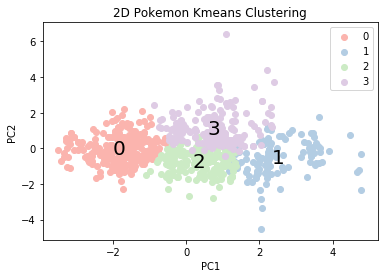

In [53]:
colors = plt.cm.Pastel1(np.linspace(0, 1, 10))
groups_keys = list(groups.keys())
#loop through labels and plot each cluster
for i, label in enumerate(groups.keys()):

    #add data points 
    plt.scatter(x=KmeansPoke.loc[KmeansPoke['klabel']==label, 'PC1'], 
                y=KmeansPoke.loc[KmeansPoke['klabel']==label,'PC2'],
                color=colors[i])
    
    #add label
    plt.annotate(label, xy = groups[groups_keys[i]],
                 horizontalalignment='center', verticalalignment='center',
                 size=20, color='k') 
    

plt.title('2D Pokemon Kmeans Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(groups_keys, loc='best')
plt.show()

In [41]:
kclus_combat_index = []
kclus_combat_table = []
for i in range(cluster_num):
    
    kclus_Idx = KmeansPoke.query('klabel == '+str(i))['#'].tolist()
    kclus_combat = combats[combats['First_pokemon'].isin(kclus_Idx) | combats['Second_pokemon'].isin(kclus_Idx)]
    winner = kclus_combat['Winner'].isin(kclus_Idx).tolist()
    kclus_combat = kclus_combat.assign(WinCombat=winner)
    kclusPivot = kclus_combat.pivot_table(values='Winner', index=['WinCombat'], aggfunc='count')
    
    locals()["c"+str(i+1)] = kclus_combat.pivot_table(values='Winner', columns=['WinCombat'], aggfunc='count')
    kclus_combat_index.append("c"+str(i))
    kclus_combat_table.append(locals()["c"+str(i+1)])


kclus_win = pd.concat(kclus_combat_table)
kclus_win.index = kclus_combat_index
total = kclus_win.sum(axis=1)

kclus_win[False] = (kclus_win[False] / total).apply('{:.2%}'.format)
kclus_win[True] = (kclus_win[True] / total).apply('{:.2%}'.format)

kclus_win

WinCombat,False,True
c0,63.08%,36.92%
c1,15.16%,84.84%
c2,19.06%,80.94%
c3,55.56%,44.44%


When we implemented kmeans clustering method, we are asked to specify how many clusters we want to generate.
- When there are 4 clusters:
    - two groups with high winning rate 
    - two group with low winning rate 

In [42]:
kstats = KmeansPoke.pivot_table(values=stats,index=['klabel'], aggfunc='mean').fillna(0)
kstats = kstats.transpose()
kstats = kstats.assign(All=pokemon[stats].mean())
kstats

klabel,0,1,2,3,All
Attack,53.678571,119.907563,84.400000,84.693878,79.00125
Defense,52.346429,92.260504,66.185366,101.377551,73.84250
HP,49.907143,89.638655,70.565854,83.163265,69.25875
Sp. Atk,47.628571,119.285714,77.839024,75.346939,72.82000
Sp. Def,49.110714,97.193277,71.624390,89.397959,71.90250
Speed,49.192857,100.134454,91.043902,52.387755,68.27750
Total,301.864286,618.420168,461.658537,486.367347,435.10250


In [43]:
pokemon[stats].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.0,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.0,230.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.0,255.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.0,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.0,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.0,180.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.0,780.0


In [50]:
kpca = KmeansPoke.pivot_table(values=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],index=['klabel'], aggfunc='mean').fillna(0)
kpca.transpose()

klabel,0,1,2,3
PC1,-1.829683,2.505731,0.332337,0.744899
PC2,-0.010223,-0.525328,-0.725396,1.092259
PC3,0.023359,-0.050505,-0.037303,0.036310
PC4,-0.008580,-0.134123,-0.139938,0.240053
PC5,-0.086957,-0.219663,0.264832,-0.019402


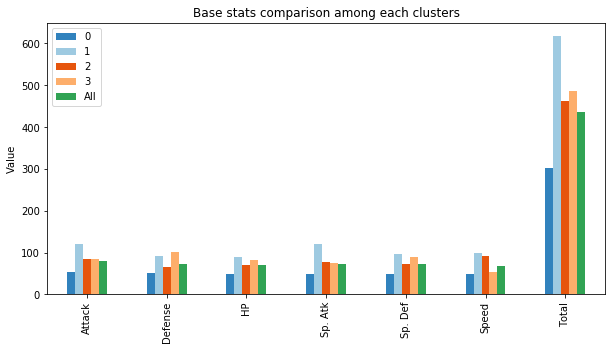

In [45]:
colors = plt.cm.tab20c(np.linspace(0, 1, 10))

ax1 = kstats.plot(kind='bar', color=colors, figsize=(10, 5))
ax1.set_ylabel("Value")
ax1.set_xticklabels(kstats.index)
ax1.set_title("Base stats comparison among each clusters")
plt.legend(prop={'size':10})
plt.show()

According to this graph, we can assume that cluster 1 has a high winning rate, while cluster 0 has a low winning rate. However, the winning rate result of cluster 2 and 3 is somehow surprising. 
- cluster 2 has a high winning rate (around 81%)
- cluster 3 has a low winning rate (around 44%)
- both average total stat of c2 and c3 are higher than the average total stat of all pokemons
- This shows that although some pokemons has high stat, but it doesn't mean they have high winning rate

In [46]:
ktype = KmeansPoke.pivot_table(values='Name', index=['Type 1'],columns=['klabel'], aggfunc='count').fillna(0).astype(int)
ktype2 = KmeansPoke.pivot_table(values='Name', index=['Type 2'],columns=['klabel'], aggfunc='count').fillna(0).astype(int)
ktype.transpose()

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
klabel,,,,,,,,,,,,,,,,,,
0,30,10,5,12,8,9,13,1,12,25,13,8,42,14,18,14,6,40
1,4,5,19,7,1,1,13,2,4,6,4,3,9,0,17,6,6,12
2,23,10,5,16,0,8,21,1,8,18,5,6,31,9,13,6,1,23
3,12,6,3,9,8,8,5,0,8,21,10,7,16,5,9,18,14,37


In [47]:
ktype2.transpose()

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
klabel,,,,,,,,,,,,,,,,,,
0,2,5,4,2,9,2,4,27,5,11,9,2,2,15,8,4,4,6
1,0,5,9,1,3,13,5,21,2,1,4,3,0,2,8,0,3,1
2,0,8,3,1,5,8,2,37,2,3,6,2,2,13,8,0,4,2
3,1,2,2,2,6,3,1,12,5,10,16,7,0,4,9,10,11,5


Discover the pokemon type in each cluster -> hard to see any specific type dominate the group

In [48]:
kleg = KmeansPoke.pivot_table(values='Name', index=['Legendary', 'Mega'],columns=['klabel'], aggfunc='count').fillna(0).astype(int)

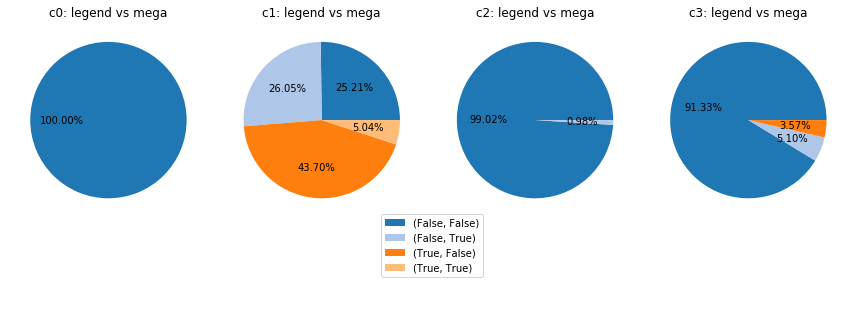

In [49]:
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 0 else ''

colors = plt.cm.tab20(np.linspace(0, 1, 20))

    
fig, axes = plt.subplots(1, 4,  figsize=(12,6))
for ax in axes.flat:
    ax.axis('off')
    
for ax, col in zip(axes.flat, kleg.columns):
    data = kleg[col]  
    
    pie = ax.pie(data, colors=colors, autopct=my_autopct)
    ax.set(ylabel='', title="c"+str(col)+": legend vs mega", aspect='equal')

fig.legend(pie[0], kleg.index, loc="center", bbox_to_anchor=(0.5,0.15))
plt.tight_layout()
plt.show()

According to this chart, we can find out that:
- c0 consists of all pokemons with non-legendary or non-mega-envolved pokemons
- c1 consists of around 75% of legendary or mega-envolved or both pokemons, which describes why this cluster has a high base stats and high winning rate
- c2 consists of 99% of non-legendary or non-mega-envolved pokemons and 1% or mega-envolved pokemons
- c3 consists of a small amount of legendary or mega-envolved pokemon

------------------------------------

# Pokemon Combat Prediction

## Data Cleaning

First pokemon attacking + type advantage > winning rate increase(?) ...

## Combat Prediction